In [4]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt


def matching(item_no, output_image_path, thresh = 0.8, scales = None):
    # Define the paths for the main image and the template
    main_image_path = '2_img.jpg'
    item_image_path = f'items2_list/item{item_no}.jpg'  # Assuming items are named as item1.png, item2.png, etc.
    
    # Load the main image and convert it to grayscale
    img_rgb = cv.imread(main_image_path)
    assert img_rgb is not None, "Main image could not be read, check the path."

    # Load the template (item) image
    template = cv.imread(item_image_path, cv.IMREAD_UNCHANGED)
    assert template is not None, f"Item image 'item{item_no}.jpg' could not be read, check the path."
    
    # Create a mask using thresholding to focus on non-white areas
    #_, mask = cv.threshold(gray_item, 220, 255, cv.THRESH_BINARY_INV)
    mask = np.any(template <= 250, axis=2).astype(np.uint8) * 255


    # Find the bounding box of the non-zero mask region
    non_zero_y, non_zero_x = np.nonzero(mask)
    top_left_y, bottom_right_y = np.min(non_zero_y), np.max(non_zero_y)
    top_left_x, bottom_right_x = np.min(non_zero_x), np.max(non_zero_x)

    # Crop the template and the mask to this bounding box
    cropped_template = template[top_left_y:bottom_right_y + 1, top_left_x:bottom_right_x + 1]
    cropped_mask = mask[top_left_y:bottom_right_y + 1, top_left_x:bottom_right_x + 1]

    # Define the scales to search through
    if scales is None:
        scales = np.arange(0.5, 2.01, 0.01)

    # Iterate through each scale and find all matches
    for scale in scales:
        # Resize the cropped template and mask according to the current scale
        scaled_template = cv.resize(cropped_template, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
        scaled_mask = cv.resize(cropped_mask, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)

        # Perform template matching with the scaled template and mask
        res = cv.matchTemplate(img_rgb, scaled_template, cv.TM_CCOEFF_NORMED, mask=scaled_mask)
        threshold = thresh  # Adjust this threshold as needed for accuracy
        loc = np.where(res >= threshold)
    
        # Draw rectangles around detected regions
        for pt in zip(*loc[::-1]):
            cv.rectangle(img_rgb, pt, (pt[0] + scaled_template.shape[1], pt[1] + scaled_template.shape[0]), (0, 0, 255), 2)
    
    # Save the result image with highlighted matches
    output_image_path = "find2/" + output_image_path + ".jpg"
    cv.imwrite(output_image_path, img_rgb)
    print(f"Result for item {item_no} saved to {output_image_path}")

    plt.imshow(cropped_mask, cmap='gray')
    plt.title(f'Mask for Item {item_no}')
    plt.axis('off')  # Hide the axis
    plt.show()


Result for item 1 saved to find2/find_1.jpg


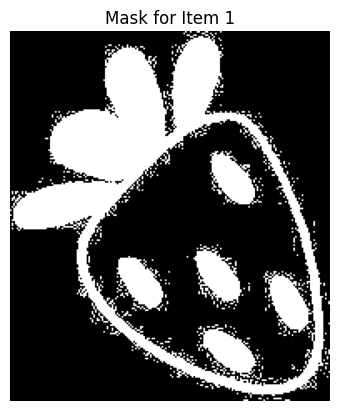

Result for item 2 saved to find2/find_2.jpg


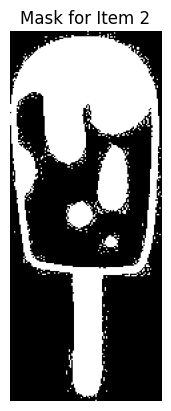

Result for item 3 saved to find2/find_3.jpg


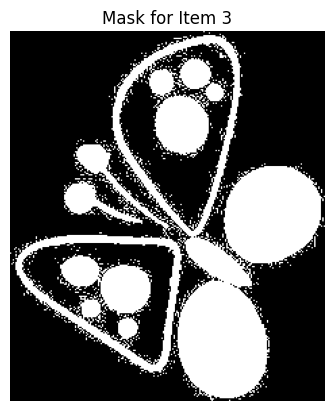

Result for item 4 saved to find2/find_4.jpg


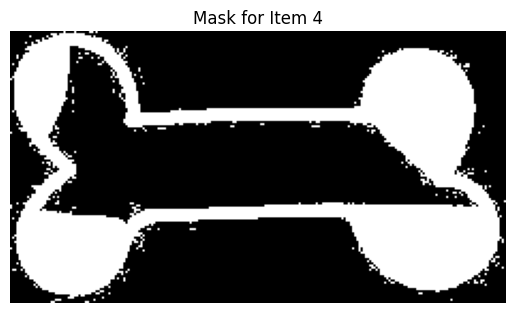

Result for item 5 saved to find2/find_5.jpg


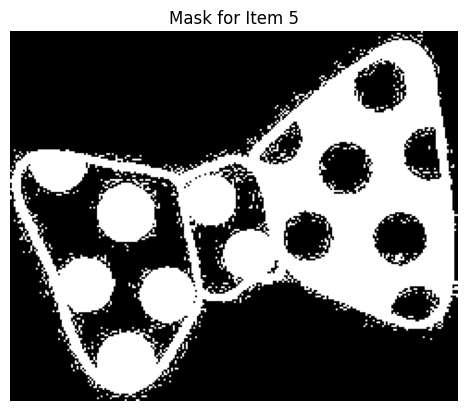

Result for item 6 saved to find2/find_6.jpg


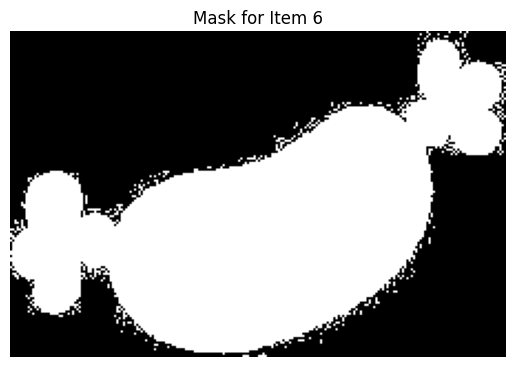

Result for item 7 saved to find2/find_7.jpg


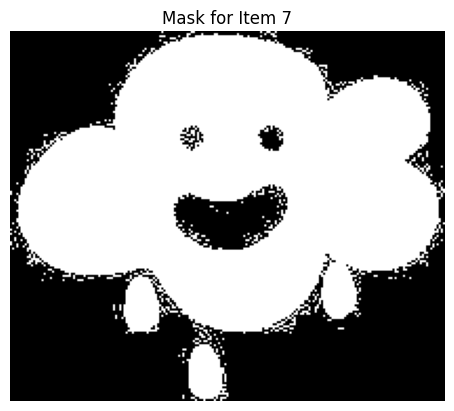

Result for item 8 saved to find2/find_8.jpg


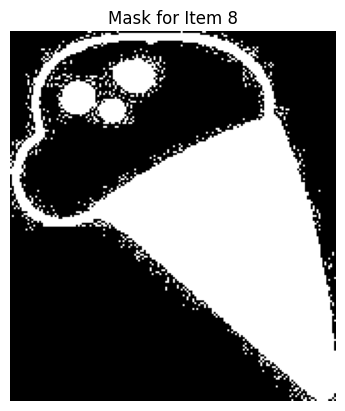

Result for item 9 saved to find2/find_9.jpg


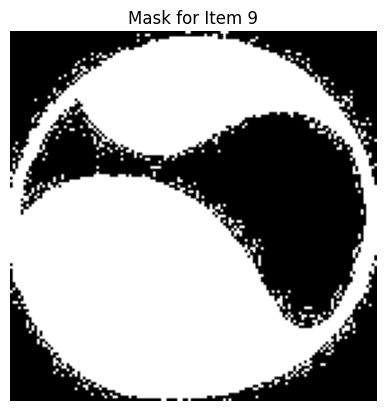

Result for item 10 saved to find2/find_10.jpg


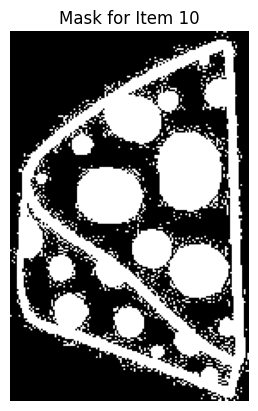

Result for item 11 saved to find2/find_11.jpg


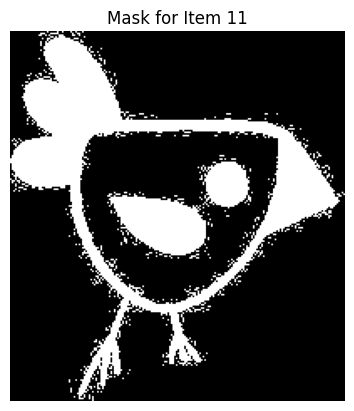

Result for item 12 saved to find2/find_12.jpg


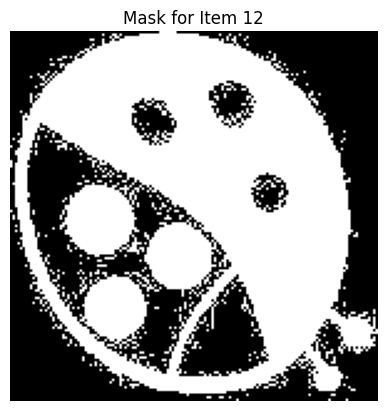

AssertionError: Item image 'item13.jpg' could not be read, check the path.

In [5]:
for i in range (1,12):
    matching(i, f'find_{i}')

Result for item 8 saved to find2/find_scale0.5_4.0_thresh0.6_8.jpg


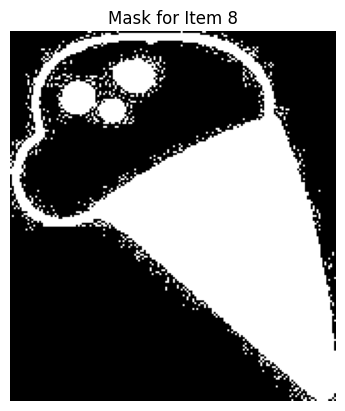

Result for item 9 saved to find2/find_scale0.5_4.0_thresh0.6_9.jpg


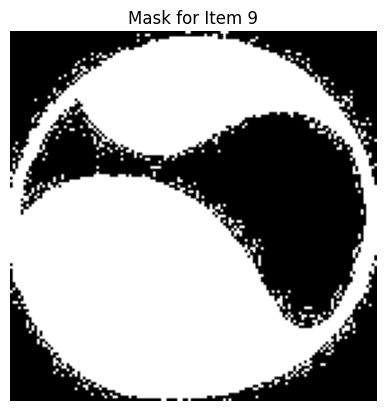

In [9]:
for i in [8,9]:
    matching(i, f'find_scale0.5_4.0_thresh0.6_{i}', scales= (np.arange(0.5, 4.25, 0.25)), thresh=0.6)

In [13]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt


def matching_no_mask(item_no, output_image_path, thresh = 0.8, scales = None):
    # Define the paths for the main image and the template
    main_image_path = '2_img.jpg'
    item_image_path = f'items2_list/item{item_no}.jpg'  # Assuming items are named as item1.png, item2.png, etc.
    
    # Load the main image and convert it to grayscale
    img_rgb = cv.imread(main_image_path)
    assert img_rgb is not None, "Main image could not be read, check the path."

    # Load the template (item) image
    template = cv.imread(item_image_path, cv.IMREAD_UNCHANGED)
    assert template is not None, f"Item image 'item{item_no}.jpg' could not be read, check the path."
    
    # Create a mask using thresholding to focus on non-white areas
    #_, mask = cv.threshold(gray_item, 220, 255, cv.THRESH_BINARY_INV)
    mask = np.any(template <= 250, axis=2).astype(np.uint8) * 255


    # Find the bounding box of the non-zero mask region
    non_zero_y, non_zero_x = np.nonzero(mask)
    top_left_y, bottom_right_y = np.min(non_zero_y), np.max(non_zero_y)
    top_left_x, bottom_right_x = np.min(non_zero_x), np.max(non_zero_x)

    # Crop the template and the mask to this bounding box
    cropped_template = template[top_left_y:bottom_right_y + 1, top_left_x:bottom_right_x + 1]
    cropped_mask = mask[top_left_y:bottom_right_y + 1, top_left_x:bottom_right_x + 1]

    # Define the scales to search through
    if scales is None:
        scales = np.arange(0.5, 2.01, 0.01)

    # Iterate through each scale and find all matches
    for scale in scales:
        # Resize the cropped template and mask according to the current scale
        scaled_template = cv.resize(cropped_template, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
        scaled_mask = cv.resize(cropped_mask, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)

        # Perform template matching with the scaled template and mask
        res = cv.matchTemplate(img_rgb, scaled_template, cv.TM_CCOEFF_NORMED)
        threshold = thresh  # Adjust this threshold as needed for accuracy
        loc = np.where(res >= threshold)
    
        # Draw rectangles around detected regions
        for pt in zip(*loc[::-1]):
            cv.rectangle(img_rgb, pt, (pt[0] + scaled_template.shape[1], pt[1] + scaled_template.shape[0]), (0, 0, 255), 2)
    
    # Save the result image with highlighted matches
    output_image_path = "find2/" + output_image_path + ".jpg"
    cv.imwrite(output_image_path, img_rgb)
    print(f"Result for item {item_no} saved to {output_image_path}")

    plt.imshow(cropped_mask, cmap='gray')
    plt.title(f'Mask for Item {item_no}')
    plt.axis('off')  # Hide the axis
    plt.show()


Result for item 8 saved to find2/find_no_mask_8.jpg


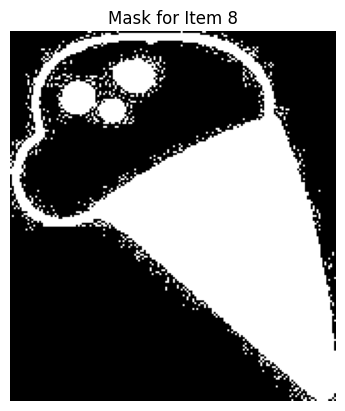

Result for item 9 saved to find2/find_no_mask_9.jpg


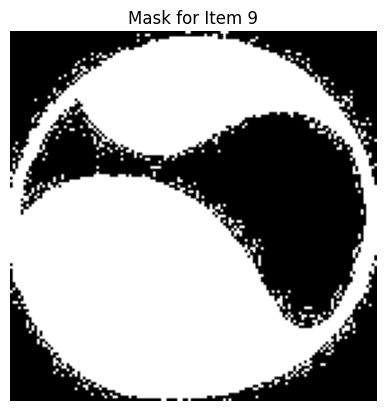

In [15]:
for i in [8,9]:
    matching_no_mask(i, f'find_no_mask_{i}', scales= (np.arange(0.5, 4.25, 0.25)), thresh=0.6)

Result for item 9 saved to find2/find_no_mask_9_thresh0.5.jpg


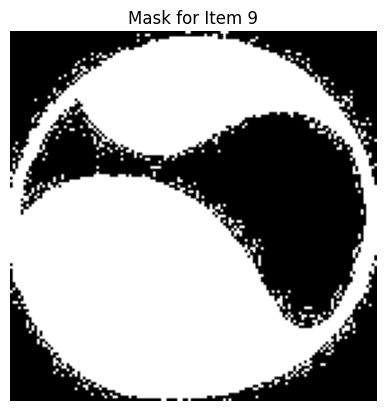

In [16]:
matching_no_mask(9, "find_no_mask_9_thresh0.5",scales= (np.arange(0.5, 4.25, 0.25)), thresh=0.5)